In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_age = pd.read_csv('../data/data/dph_dash_ems_naloxone_age.csv')

In [3]:
df_age

,Age.Group,Number.of.Records,Percent.of.Total.Number.of.Individuals
0,19-24,1613,9.00%
1,25-34,6054,34.00%
2,35-44,4219,23.00%
3,45-54,3511,20.00%
4,55-64,2590,14.00%


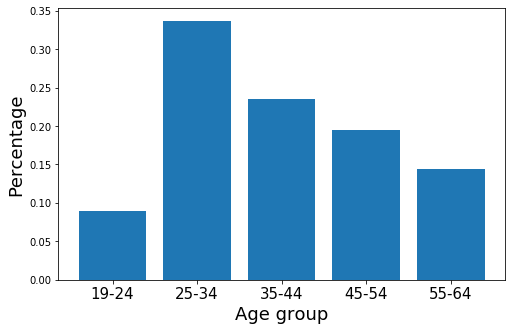

In [4]:
fig = plt.figure(figsize=(8, 5))
plt.bar([0, 1, 2, 3, 4], df_age['Number.of.Records']/df_age['Number.of.Records'].sum());
plt.xticks([0, 1, 2, 3, 4], df_age['Age.Group'], fontsize=15);
plt.xlabel('Age group', fontsize=18)
plt.ylabel('Percentage', fontsize=18)
plt.savefig('age_dist.png', dpi=fig.dpi)

In [5]:
df_sex = pd.read_csv('../data/data/dph_dash_ems_naloxone_sex.csv')
df_sex

,Gender,Number.of.Records,Percent.of.Total.Number.of.Individuals
0,F,5275,30.00%
1,M,12387,70.00%


In [6]:
df_zip = pd.read_csv('../data/data/dph_dash_ems_naloxone_zip.csv')

In [7]:
df_zip

,Pickup.Zip.Code,Numebr.of.Records
0,19116,187
1,19154,281
2,19115,149
3,19114,233
4,19111,301
5,19152,232
6,19136,444
7,19149,356
8,19135,566
9,19137,176


In [8]:
import pgeocode

In [9]:
nomi = pgeocode.Nominatim('us')

In [10]:
nomi.query_postal_code("19153")

postal_code              19153
country code                US
place_name        Philadelphia
state_name        Pennsylvania
state_code                  PA
county_name       Philadelphia
county_code                101
community_name             NaN
community_code             NaN
latitude               39.9055
longitude             -75.2444
accuracy                     4
Name: 0, dtype: object

In [11]:
info = nomi.query_postal_code("19153")

In [12]:
longitude = []
latitude = []
for ind in range(len(df_zip)):
    zip_code = df_zip.iloc[ind,:]['Pickup.Zip.Code']
    info = nomi.query_postal_code(str(zip_code))
    longitude.append(info['longitude'])
    latitude.append(info['latitude'])

In [13]:
df_zip['longitude'] = longitude
df_zip['latitude'] = latitude

In [14]:
df_zip

,Pickup.Zip.Code,Numebr.of.Records,longitude,latitude
0,19116,187,-75.0198,40.1166
1,19154,281,-74.9781,40.0897
2,19115,149,-75.0410,40.0903
3,19114,233,-74.9990,40.0634
4,19111,301,-75.0818,40.0596
5,19152,232,-75.0471,40.0606
6,19136,444,-75.0244,40.0422
7,19149,356,-75.0664,40.0369
8,19135,566,-75.0518,40.0247
9,19137,176,-75.0727,40.0008


In [15]:
df_zip.to_csv('dph_dash_ems_naloxone_zip_long_lat.csv', index=False)

In [16]:
background_map = plt.imread('philly_map.png')

In [17]:
BBox = (min(longitude), max(longitude), min(latitude), max(latitude))

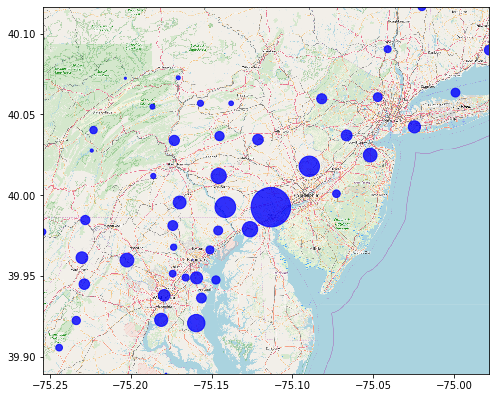

In [18]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(longitude, latitude, zorder=1, alpha= 0.8, c='b', s=df_zip['Numebr.of.Records']/3)
# df_zip.plot(kind="scatter", x="longitude", y="latitude",
#     s=df_zip['Numebr.of.Records']/10,alpha=0.8, figsize=(10,7))
ax.imshow(background_map, zorder=0, extent = BBox, aspect= 'equal')
plt.savefig('ems_on_a_map.png')